**01: PROJECT WRANGLING/EDA**

1.	What is in your data?

CDC Diabetes Health Indicators dataset from Kaggle

Variables include:
Diabetes, High BP, High Cholesterol, Cholesterol Check, BMI, Smoker, Stroke, Heart Disease or Attack, Physical activity, Consumes Fruits, Consumes Veggies, Heavy Alcohol Consumption, Any Healthcare, No doctor because of cost, General Health, Mental Health, Physical Health, Difficulty Walking, Sex, Age, Education, Income


2. How will these data be useful for studying the phenomenon you're interested in?

As this data includes many common health indicators of diabetes, for example cholesterol and physical activity, it will be helpful to create a model to predict people’s risk of diabetes based on their current health status.


3.	What are the challenges you've resolved or expect to face in using them?

As the data is relatively clean already, the biggest challenge will be creating an effective and efficient model. With the nature of the dataset, we plan on using a Random Forest model to make predictions; however, we have minimal background with this style of machine learning. Therefore, a major challenge of this project will be learning and understanding this method before implementing it.


EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


dataset = 'https://raw.githubusercontent.com/ashleynguyen04/DS3001-Project/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(dataset)

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


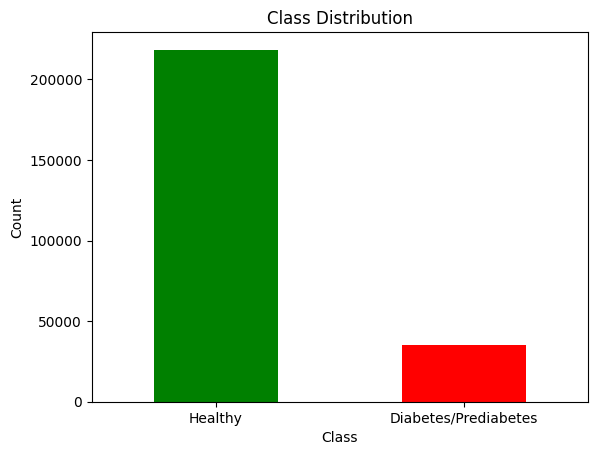

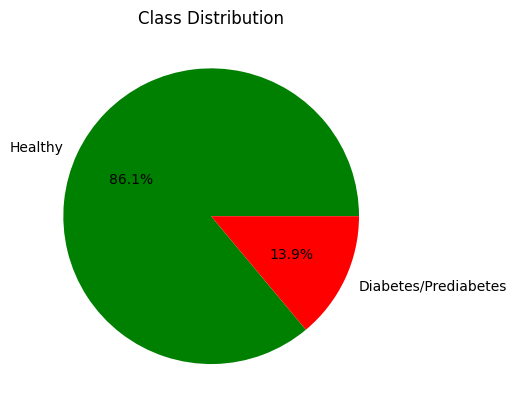

Numerical Feature Statistics:
              count       mean       std   min   25%   50%   75%   max  median
Age       253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0  13.0     8.0
BMI       253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0  98.0    27.0
PhysHlth  253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0  30.0     0.0

Frequency count for HighBP:
HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64

Frequency count for HighChol:
HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64

Frequency count for PhysActivity:
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64


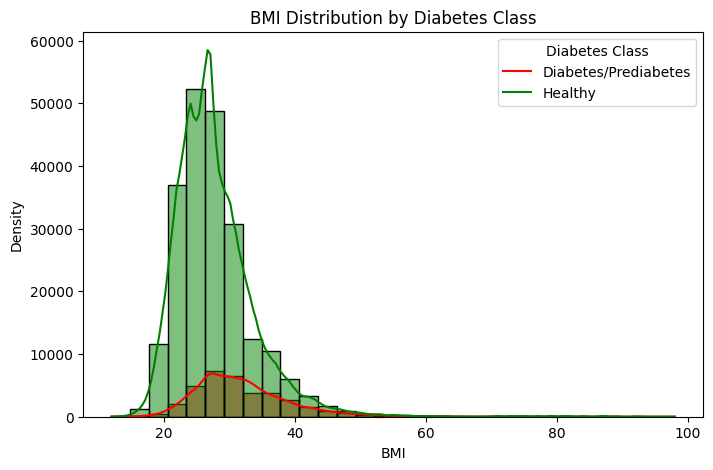

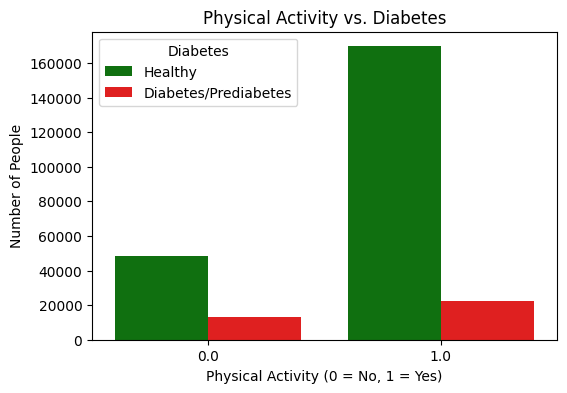

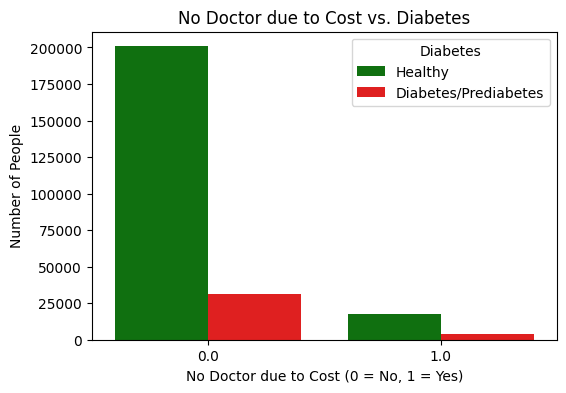

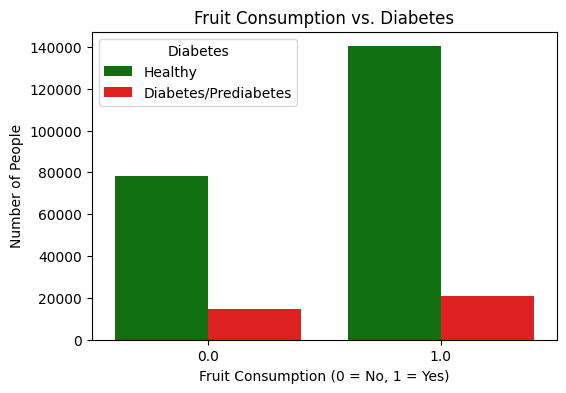

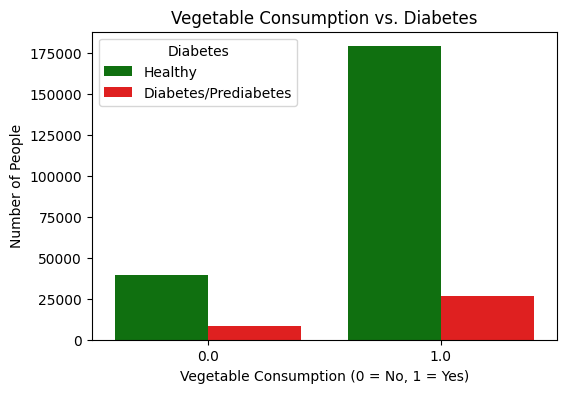

<ipython-input-9-277600bf7227>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=feature, data=df, palette=['green', 'red'])


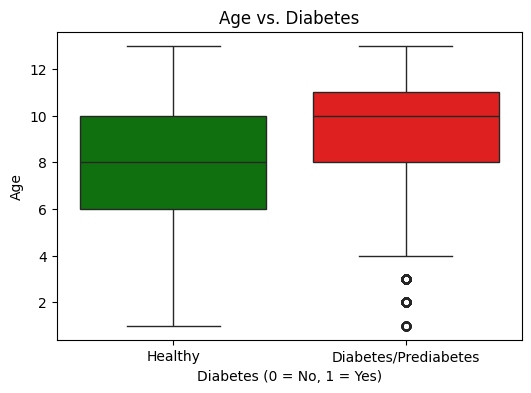

<ipython-input-9-277600bf7227>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=feature, data=df, palette=['green', 'red'])


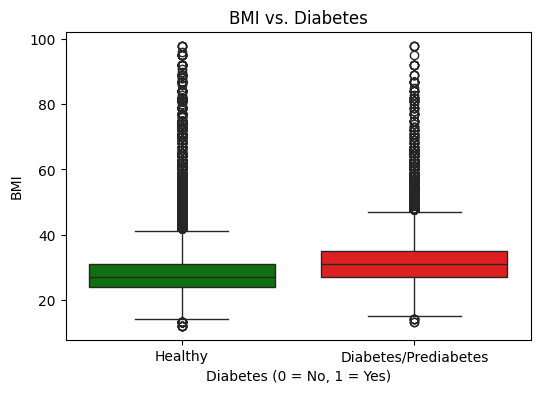

<ipython-input-9-277600bf7227>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=feature, data=df, palette=['green', 'red'])


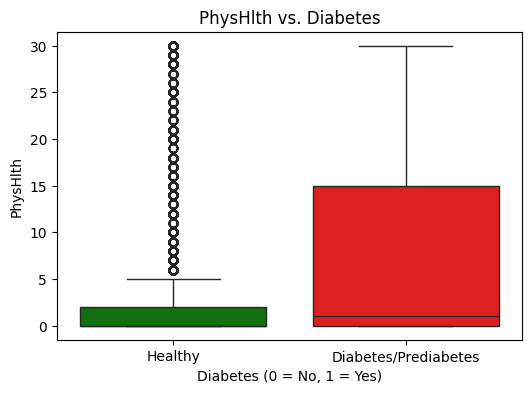

In [9]:
# Bar and pie chart for class distribution
distribution = df['Diabetes_binary'].value_counts()
distribution.plot(kind='bar', color=['green', 'red'], title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'Diabetes/Prediabetes'], rotation=0)
plt.show()

# Pie chart
distribution.plot(kind='pie', labels=['Healthy', 'Diabetes/Prediabetes'], autopct='%1.1f%%',
                  colors=['green', 'red'], title='Class Distribution')
plt.ylabel('')
plt.show()

# Define some features
num_features = ['Age', 'BMI', 'PhysHlth']
cat_features = ['HighBP', 'HighChol', 'PhysActivity']

# Numerical summary
num_summary = df[num_features].describe().T
num_summary['median'] = df[num_features].median()
print("Numerical Feature Statistics:\n", num_summary)

# Categorical frequency counts
for col in cat_features:
    if col in df.columns:
        print(f"\nFrequency count for {col}:")
        print(df[col].value_counts())
    else:
        print(f"\nWarning: Column '{col}' not found in dataset.")

# Histogram/KDE for BMI across diabetes groups
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BMI', hue='Diabetes_binary', kde=True, bins=30, palette={0: 'green', 1: 'red'}, hue_order=[0, 1])
plt.title("BMI Distribution by Diabetes Class")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend(title="Diabetes Class", labels=['Diabetes/Prediabetes', 'Healthy'])
plt.show()

# Physical Activity vs. Diabetes (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='PhysActivity', hue='Diabetes_binary', data=df, palette={0: 'green', 1: 'red'})
plt.title('Physical Activity vs. Diabetes')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.legend(title='Diabetes', labels=['Healthy', 'Diabetes/Prediabetes'])
plt.show()

# NoDocbcCost vs. Diabetes (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='NoDocbcCost', hue='Diabetes_binary', data=df, palette={0: 'green', 1: 'red'})
plt.title('No Doctor due to Cost vs. Diabetes')
plt.xlabel('No Doctor due to Cost (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.legend(title='Diabetes', labels=['Healthy', 'Diabetes/Prediabetes'])
plt.show()

# Fruits Consumption vs. Diabetes (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='Fruits', hue='Diabetes_binary', data=df, palette={0: 'green', 1: 'red'})
plt.title('Fruit Consumption vs. Diabetes')
plt.xlabel('Fruit Consumption (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.legend(title='Diabetes', labels=['Healthy', 'Diabetes/Prediabetes'])
plt.show()

# Veggies Consumption vs. Diabetes (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='Veggies', hue='Diabetes_binary', data=df, palette={0: 'green', 1: 'red'})
plt.title('Vegetable Consumption vs. Diabetes')
plt.xlabel('Vegetable Consumption (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.legend(title='Diabetes', labels=['Healthy', 'Diabetes/Prediabetes'])
plt.show()

# Box plots for numerical features vs Diabetes
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diabetes_binary', y=feature, data=df, palette=['green', 'red'])
    plt.title(f'{feature} vs. Diabetes')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Healthy', 'Diabetes/Prediabetes'])
    plt.show()